<a href="https://colab.research.google.com/github/reitezuz/18NES1-2025-/blob/main/week3/linear_neuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear neuron

##1. LSQ Algorithm
- and the SSE (The Sum squared error), SAE (The Sum absolute error), MSE (The Mean squared error), MAE (The Mean absolute error) functions



In [89]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import time

class LinearNeuron:
    def __init__(self, weights, bias):
        self.weights = np.array(weights, dtype=float)
        self.bias = bias
        self.epochs = -1

    def __str__(self):
        return f"LinearNeuron(weights={self.weights}, bias={self.bias})"

    def activation(self, x):
        return x

    def forward(self, inputs):
        potential = np.dot(inputs, self.weights) + self.bias
        return self.activation(potential)


    def LSQ(self, training_inputs, true_outputs):
        X_aug = np.hstack([training_inputs, np.ones((training_inputs.shape[0], 1))]) # extend the input by ones

        weights_aug, _, _, _ = np.linalg.lstsq(X_aug, true_outputs, rcond=None)     # using library function

        self.weights, self.bias = weights_aug[:-1], weights_aug[-1]

    def LSQ_pseudoinverse(self, training_inputs, true_outputs):
        X_aug = np.hstack([training_inputs, np.ones((training_inputs.shape[0], 1))]) # extend the input by ones

        weights_aug = np.linalg.pinv(X_aug.T @ X_aug) @ X_aug.T @ true_outputs   # using Moore-Penrose

        self.weights, self.bias = weights_aug[:-1], weights_aug[-1]

    def LSQ_tichonov(self, training_inputs, true_outputs):
        X_aug = np.hstack([training_inputs, np.ones((training_inputs.shape[0], 1))]) # extend the input by ones

        n = X_aug.shape[1]
        weights_aug = np.linalg.solve((X_aug.T @ X_aug) + np.eye(n), X_aug.T @ true_outputs)

        self.weights, self.bias = weights_aug[:-1], weights_aug[-1]

def plot_decision_boundary_2D(perceptron, training_inputs, true_outputs):
    """Plots the decision boundary of the perceptron."""
    import matplotlib.pyplot as plt
    import numpy as np

    # Extract the first two columns of training_inputs
    x1 = training_inputs[:, 0]
    x2 = training_inputs[:, 1]

    # Generate points for visualization
    x_min, x_max = np.min(x1) - 1, np.max(x1) + 1  # Extend the range slightly
    y_min, y_max = np.min(x2) - 1, np.max(x2) + 1  # Extend the range slightly

    x = np.linspace(x_min, x_max, 100)
    y = -(perceptron.weights[0] * x + perceptron.bias) / perceptron.weights[1]

    plt.figure(figsize=(5, 3))
    # Plot the decision boundary
    plt.plot(x, y, label='Decision Boundary')

    # Plot the points
    for i, input_vector in enumerate(training_inputs):
        if true_outputs[i] == 1:
            plt.scatter(input_vector[0], input_vector[1], color='green', label='Class 1' if i == 0 else "")  # Add label only for the first point of each class
        else:
            plt.scatter(input_vector[0], input_vector[1], color='red', label='Class -1' if i == 0 else "")

    plt.xlabel('x1', fontsize=12)
    plt.ylabel('x2', fontsize=12)
    plt.title('Perceptron Decision Boundary', fontsize=14)
    plt.grid(True)
    plt.legend()
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)  # Set y-axis limits

    # Highlight x and y axes
    plt.axhline(0, color='black', linewidth=0.8)  # x-axis
    plt.axvline(0, color='black', linewidth=0.8)  # y-axis
    plt.show()

def plot_regression(perceptron, training_inputs, true_outputs):
    """Plots the data points and the regression line."""
    plt.figure(figsize=(5, 3))
    plt.scatter(training_inputs, true_outputs, label="Data points", color='blue', alpha=0.6)

    # Generate predictions for the regression line
    X_test = np.linspace(-1, 1, 100).reshape(-1, 1)
    d_pred = perceptron.weights * X_test + perceptron.bias

    plt.plot(X_test, d_pred, label="Regression line", color='red', linewidth=2)
    plt.xlabel("x_1")
    plt.ylabel("y")
    plt.legend()
    plt.title("Linear Regression Fit")
    plt.show()

def sign(x):
    return np.where(x > 0, 1, np.where(x < 0, -1, 0))

def perceptron_error(true_outputs, predicted_outputs):
    return np.sum(true_outputs != predicted_outputs)

def SSE_error(true_outputs, predicted_outputs):
    # The Sum squared error
    return np.sum((true_outputs - predicted_outputs) ** 2)
def SAE_error(true_outputs, predicted_outputs):
    # The Sum absolute error
    return np.sum(np.abs(true_outputs - predicted_outputs))
def MAE_error(true_outputs, predicted_outputs):
    # The Mean absolute error
    return np.mean(np.abs(true_outputs - predicted_outputs))
def MSE_error(true_outputs, predicted_outputs):
    # The Mean squared error
    return np.mean((true_outputs - predicted_outputs) ** 2)

def run_example_LSQ(experiment_results, inputs, true_outputs, weights, bias, print_progress, variant, data_description):
    times = []
    errors = []
    epoch_counts = []


    perceptron = LinearNeuron(weights, bias)
    start_time = time.time()
    if variant == 'pseudoinverse':
        perceptron.LSQ_pseudoinverse(inputs, true_outputs)  # Suppress individual run progress
    elif variant == 'tichonov':
        perceptron.LSQ_tichonov(inputs, true_outputs)  # Suppress individual run progress
    else:
        perceptron.LSQ(inputs, true_outputs)  # Suppress individual run progress
    end_time = time.time()
    elapsed_time = end_time - start_time

    real_outputs = perceptron.forward(inputs)
    error_MSE = MSE_error(true_outputs, real_outputs)
    error_SSE = SSE_error(true_outputs, real_outputs)

    results = {
        'MSE': error_MSE,
        'SSE': error_SSE,
        'Time': elapsed_time,
        'Variant': variant,
        'Weights': perceptron.weights, #Note: Weights and bias are from the last run.
        'Bias': perceptron.bias,
        'Data Description': data_description
    }
    experiment_results.loc[len(experiment_results)] = results

### Example 1
- train the linear neuron on the given data:
- you can change the training data ant the variant of LSQ:

LinearNeuron(weights=[-0.5 -0.5], bias=0.5)
LSQ: pseudoinverse
Perceptron error: 4
SSE error: 1.0
MSE error: 0.25
SAE error: 2.0
MAE error: 0.5


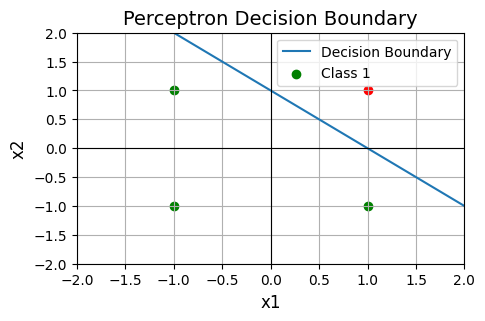

,Input,Predicted,True
0,"[-1, -1]",1.5,1
1,"[-1, 1]",0.5,1
2,"[1, -1]",0.5,1
3,"[1, 1]",-0.5,-1


In [7]:
# Example 1 from the presentation:
# Data:
inputs = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])
true_outputs = np.array([1, 1, 1, -1])
#variant = "tichonov"
variant = "pseudoinverse"
#variant = "library"

# Perceptron parameters:
weights = [0, 0]
bias = 0

# Train the linear neuron:
perceptron = LinearNeuron(weights, bias)
if variant == "library":
    perceptron.LSQ(inputs, true_outputs)
elif variant == "pseudoinverse":
    perceptron.LSQ_pseudoinverse(inputs, true_outputs)
elif variant == "tichonov":
    perceptron.LSQ_tichonov(inputs, true_outputs)

# Print summary:
print(perceptron)
print("LSQ:", variant)
real_outputs = perceptron.forward(inputs) # forward for the whole dataset
print(f"Perceptron error: {perceptron_error(true_outputs, real_outputs)}")
print(f"SSE error: {SSE_error(true_outputs, real_outputs)}")
print(f"MSE error: {MSE_error(true_outputs, real_outputs)}")
print(f"SAE error: {SAE_error(true_outputs, real_outputs)}")
print(f"MAE error: {MAE_error(true_outputs, real_outputs)}")
plot_decision_boundary_2D(perceptron, inputs, true_outputs)

# Create a pandas DataFrame for a nice table
import pandas as pd
df = pd.DataFrame(columns=['Input', 'Predicted', 'True'])
for inputs, label in zip(inputs, true_outputs):
    df.loc[len(df)] = {'Input': inputs, 'Predicted': perceptron.forward(inputs), 'True': label}

df


- comparison of LSQ variants:

In [8]:
# Example 1
experiment_results = pd.DataFrame(columns=['MSE', 'SSE', 'Time', 'Variant', 'Weights', 'Bias', 'Data Description'])
inputs = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])
true_outputs = np.array([1, 1, 1, -1])
data_description = "Example 1"

# Perceptron parameters:
weights = [0, 0, 0]
bias = 0
print_progress = False
for variant in ['library', 'pseudoinverse', 'tichonov']:
    run_example_LSQ(experiment_results, inputs, true_outputs, weights, bias, print_progress, variant, data_description)

print("\nExperiment Results:")
experiment_results


Experiment Results:


,MSE,SSE,Time,Variant,Weights,Bias,Data Description
0,0.25,1.00,0.002752,library,"[-0.5, -0.49999999999999994]",0.5,Example 1
1,0.25,1.00,0.000327,pseudoinverse,"[-0.5, -0.5]",0.5,Example 1
2,0.28,1.12,0.003205,tichonov,"[-0.4, -0.4]",0.4,Example 1


- observe carefully the predicted values

### Example 2
- train the linear neuron on the given data:
- you can change the training data ant the variant of LSQ:

LinearNeuron(weights=[ 0.         -0.66666667], bias=0.0)
LSQ: tichonov
Perceptron error: 2
SSE error: 0.22222222222222227
MSE error: 0.11111111111111113
SAE error: 0.6666666666666667
MAE error: 0.33333333333333337


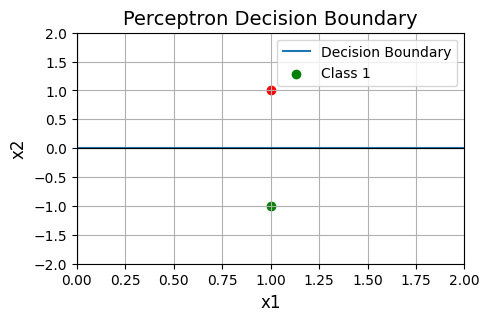

,Input,Predicted,True
0,"[1, -1]",0.666667,1
1,"[1, 1]",-0.666667,-1


In [ ]:
# Example 2 from the presentation:
# Data:
inputs = np.array([[1, -1], [1, 1]])
true_outputs = np.array([1, -1])
#variant = "library"
#variant = "pseudoinverse"
variant = "tichonov"

# Perceptron parameters:
weights = [0, 0]
bias = 0

# Train the linear neuron:
perceptron = LinearNeuron(weights, bias)
if variant == "library":
    perceptron.LSQ(inputs, true_outputs)
elif variant == "pseudoinverse":
    perceptron.LSQ_pseudoinverse(inputs, true_outputs)
elif variant == "tichonov":
    perceptron.LSQ_tichonov(inputs, true_outputs)

# Print summary:
print(perceptron)
print("LSQ:", variant)
real_outputs = perceptron.forward(inputs) # forward for the whole dataset
error = perceptron_error(true_outputs, real_outputs)
print(f"Perceptron error: {perceptron_error(true_outputs, real_outputs)}")
print(f"SSE error: {SSE_error(true_outputs, real_outputs)}")
print(f"MSE error: {MSE_error(true_outputs, real_outputs)}")
print(f"SAE error: {SAE_error(true_outputs, real_outputs)}")
print(f"MAE error: {MAE_error(true_outputs, real_outputs)}")
plot_decision_boundary_2D(perceptron, inputs, true_outputs)

# Create a pandas DataFrame for a nice table
import pandas as pd
df = pd.DataFrame(columns=['Input', 'Predicted', 'True'])
for inputs, label in zip(inputs, true_outputs):
    df.loc[len(df)] = {'Input': inputs, 'Predicted': perceptron.forward(inputs), 'True': label}

df

- comparison:

In [14]:
# Example 2 from the presentation:
# Data:
inputs = np.array([[1, -1], [1, 1]])
true_outputs = np.array([1, -1])
experiment_results = pd.DataFrame(columns=['MSE', 'SSE', 'Time', 'Variant', 'Weights', 'Bias', 'Data Description'])
data_description = "Example 2"

# Perceptron parameters:
weights = [0, 0, 0]
bias = 0
print_progress = False
for variant in ['library', 'pseudoinverse', 'tichonov']:
    run_example_LSQ(experiment_results, inputs, true_outputs, weights, bias, print_progress, variant, data_description)

print("\nExperiment Results:")
experiment_results


Experiment Results:


,MSE,SSE,Time,Variant,Weights,Bias,Data Description
0,3.204747e-31,6.409495e-31,0.000883,library,"[-3.3306690738754696e-16, -1.0000000000000002]",-2.775558e-16,Example 2
1,0.000000e+00,0.000000e+00,0.000788,pseudoinverse,"[0.0, -1.0]",0.000000e+00,Example 2
2,1.111111e-01,2.222222e-01,0.000149,tichonov,"[0.0, -0.6666666666666666]",0.000000e+00,Example 2


### Example: XOR

LinearNeuron(weights=[0. 0.], bias=0.0)
LSQ: pseudoinverse
Perceptron error: 4
SSE error: 4.0
MSE error: 1.0


<ipython-input-297-58f923f798a1>:58: RuntimeWarning: invalid value encountered in divide
  y = -(perceptron.weights[0] * x + perceptron.bias) / perceptron.weights[1]


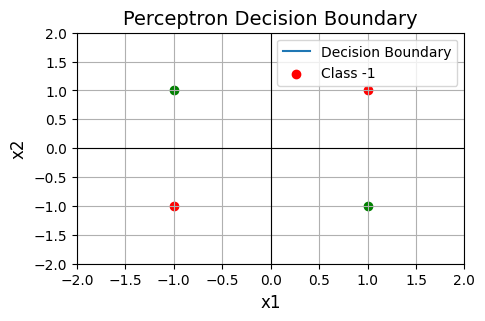

,Input,Predicted,True
0,"[-1, -1]",0.0,-1
1,"[-1, 1]",0.0,1
2,"[1, -1]",0.0,1
3,"[1, 1]",0.0,-1


In [ ]:
# Example XOR:
# Data:
inputs = np.array([ [-1, -1],
                    [-1,  1],
                    [ 1, -1],
                    [ 1,  1]])
true_outputs = np.array([-1, 1, 1, -1])
#variant = "library"
variant = "pseudoinverse"
#variant = "tichonov"

# Perceptron parameters:
weights = [0, 0]
bias = 0

# Train the linear neuron:
perceptron = LinearNeuron(weights, bias)
if variant == "library":
    perceptron.LSQ(inputs, true_outputs)
elif variant == "pseudoinverse":
    perceptron.LSQ_pseudoinverse(inputs, true_outputs)
elif variant == "tichonov":
    perceptron.LSQ_tichonov(inputs, true_outputs)

# Print summary:
print(perceptron)
print("LSQ:", variant)
real_outputs = perceptron.forward(inputs) # forward for the whole dataset
print(f"Perceptron error: {perceptron_error(true_outputs, real_outputs)}")
print(f"SSE error: {SSE_error(true_outputs, real_outputs)}")
print(f"MSE error: {MSE_error(true_outputs, real_outputs)}")
plot_decision_boundary_2D(perceptron, inputs, true_outputs)

# Create a pandas DataFrame for a nice table
import pandas as pd
df = pd.DataFrame(columns=['Input', 'Predicted', 'True'])
for inputs, label in zip(inputs, true_outputs):
    df.loc[len(df)] = {'Input': inputs, 'Predicted': perceptron.forward(inputs), 'True': label}

df

### Example 3: Linear regression

LinearNeuron(weights=[[1.55575211]], bias=[3.00711376])
LSQ: library
Perceptron error: 100
MAE error: 0.16914232410485205
MSE error: 0.04561545832850948


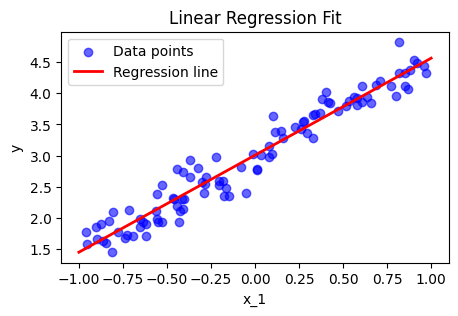

,Input,Predicted,True
0,[0.0818497744668436],[3.134451715453951],[3.1511571265900336]
1,[-0.5256061550847395],[2.1894008702876224],[2.536606569085486]
2,[0.09368374347048247],[3.1528624377211893],[3.0232664192602834]
3,[0.5348249567771897],[3.839168811882282],[3.8722433558350007]
4,[0.7695782295853895],[4.204386711782808],[4.112017072381019]
...,...,...,...
95,[0.11316923682029145],[3.1831770351477275],[3.3810112679730344]
96,[0.5763777667495633],[3.903814683743992],[3.8147644259410947]
97,[-0.149150036501994],[2.7750732717362094],[2.353530957783825]
98,[-0.2999553298817563],[2.5404576181046674],[2.5793996659023097]


In [ ]:
# Example: simple linear regression
# Data:
N = 100  # The number of samples
D = 1  # The number of features
inputs = np.random.uniform(-1, 1, size=(N, D))  # Random values between -1 and 1
true_outputs = 1.5 * inputs[:, [0]] + 3 + np.random.randn(N, 1) / 5

variant = "library"
#variant = "pseudoinverse"
#variant = "tichonov"

# Perceptron parameters:
weights = [0]
bias = 0

# Train the linear neuron:
perceptron = LinearNeuron(weights, bias)
if variant == "library":
    perceptron.LSQ(inputs, true_outputs)
elif variant == "pseudoinverse":
    perceptron.LSQ_pseudoinverse(inputs, true_outputs)
elif variant == "tichonov":
    perceptron.LSQ_tichonov(inputs, true_outputs)

# Print summary:
print(perceptron)
print("LSQ:", variant)
real_outputs = perceptron.forward(inputs) # forward for the whole dataset
print(f"Perceptron error: {perceptron_error(true_outputs, real_outputs)}")
print(f"MAE error: {MAE_error(true_outputs, real_outputs)}")
print(f"MSE error: {MSE_error(true_outputs, real_outputs)}")
plot_regression(perceptron, inputs, true_outputs)

# Create a pandas DataFrame for a nice table
import pandas as pd
df = pd.DataFrame(columns=['Input', 'Predicted', 'True'])
for inputs, label in zip(inputs, true_outputs):
    df.loc[len(df)] = {'Input': inputs, 'Predicted': perceptron.forward(inputs), 'True': label}

df

- comparison:

In [91]:
N = 100  # The number of samples
D = 1  # The number of features
inputs = np.random.uniform(-1, 1, size=(N, D))  # Random values between -1 and 1
true_outputs = 1.5 * inputs[:, [0]] + 3 + np.random.randn(N, 1) / 5

experiment_results = pd.DataFrame(columns=['MSE', 'SSE', 'Time', 'Variant', 'Weights', 'Bias', 'Data Description'])
data_description = "Simple regression"

# Perceptron parameters:
weights = [0, 0, 0]
bias = 0
print_progress = False
for variant in ['library', 'pseudoinverse', 'tichonov']:
    run_example_LSQ(experiment_results, inputs, true_outputs, weights, bias, print_progress, variant, data_description)

print("\nExperiment Results:")
experiment_results


Experiment Results:


,MSE,SSE,Time,Variant,Weights,Bias,Data Description
0,0.039884,3.988414,0.000362,library,[[1.535995236967168]],[2.992973967939468],Simple regression
1,0.039884,3.988414,0.000607,pseudoinverse,[[1.5359952369671688]],[2.99297396793947],Simple regression
2,0.041424,4.142444,0.000307,tichonov,[[1.491505602645516]],[2.96338844984808],Simple regression


### Example 3B - Linear regression with two input dimensions

In [90]:
# Define parameters
N = 100
D = 2
# Generate x1 and x2
x1 = np.linspace(-1, 1, N).reshape(-1, 1)  # Column vector (N,1)
x2 = np.linspace(-1, 1, N).reshape(-1, 1)
x2 = x2[np.random.permutation(N)]  # Randomly shuffle x2
inputs = np.hstack([x1, x2])
# TRY different coefficients and noise:
true_outputs = 2*x1 + 3*x2 - 4 + np.random.randn(*x1.shape)/2 + np.random.randn(*x1.shape)/5 * x1
#true_outputs = -4*x1 + 6*x2 + 10 + np.random.randn(*x1.shape)/2 + np.random.randn(*x1.shape)/5 * x1

variant = "library"
#variant = "pseudoinverse"
#variant = "tichonov"

# Perceptron parameters:
weights = [0, 0]
bias = 0

# Train the linear neuron:
perceptron = LinearNeuron(weights, bias)
if variant == "library":
    perceptron.LSQ(inputs, true_outputs)
elif variant == "pseudoinverse":
    perceptron.LSQ_pseudoinverse(inputs, true_outputs)
elif variant == "tichonov":
    perceptron.LSQ_tichonov(inputs, true_outputs)

# Print summary:
print(perceptron)
print("LSQ:", variant)
real_outputs = perceptron.forward(inputs) # forward for the whole dataset
print(f"Perceptron error: {perceptron_error(true_outputs, real_outputs)}")
print(f"MAE error: {MAE_error(true_outputs, real_outputs)}")
print(f"MSE error: {MSE_error(true_outputs, real_outputs)}")
#plot_regression(perceptron, inputs, true_outputs)

# Create a pandas DataFrame for a nice table
import pandas as pd
df = pd.DataFrame(columns=['Input', 'Predicted', 'True'])
for inputs, label in zip(inputs, true_outputs):
    df.loc[len(df)] = {'Input': inputs, 'Predicted': perceptron.forward(inputs), 'True': label}

df



LinearNeuron(weights=[[2.07663184]
 [2.903132  ]], bias=[-4.01838606])
LSQ: library
Perceptron error: 100
MAE error: 0.4510244244414048
MSE error: 0.3003379679363533


,Input,Predicted,True
0,"[-1.0, -0.5151515151515151]",[-7.590570750377893],[-6.401904970050609]
1,"[-0.9797979797979798, -0.3939393939393939]",[-7.196723804388897],[-8.260886939667222]
2,"[-0.9595959595959596, 0.5757575757575759]",[-4.339613345381781],[-5.292223672120428]
3,"[-0.9393939393939394, -0.7575757575757576]",[-8.168503850280992],[-7.968180828610082]
4,"[-0.9191919191919192, 0.31313131313131315]",[-5.018147734962195],[-5.704546540612761]
...,...,...,...
95,"[0.9191919191919193, 0.7171717171717173]",[-0.02751869395243256],[0.3298859674601573]
96,"[0.9393939393939394, 0.6767676767676769]",[-0.1028647980621269],[-0.09957317291195392]
97,"[0.9595959595959598, 0.05050505050505061]",[-1.8790357087795706],[-1.5008621752750961]
98,"[0.9797979797979799, -0.41414141414141414]",[-3.186013569398325],[-3.037672806291166]


- comparison:

In [93]:
N = 100
D = 2
# Generate x1 and x2
x1 = np.linspace(-1, 1, N).reshape(-1, 1)  # Column vector (N,1)
x2 = np.linspace(-1, 1, N).reshape(-1, 1)
x2 = x2[np.random.permutation(N)]  # Randomly shuffle x2
inputs = np.hstack([x1, x2])
# TRY different coefficients and noise:
true_outputs = 2*x1 + 3*x2 - 4 + np.random.randn(*x1.shape)/2 + np.random.randn(*x1.shape)/5 * x1
#true_outputs = -4*x1 + 6*x2 + 10 + np.random.randn(*x1.shape)/2 + np.random.randn(*x1.shape)/5 * x1

experiment_results = pd.DataFrame(columns=['MSE', 'SSE', 'Time', 'Variant', 'Weights', 'Bias', 'Data Description'])
data_description = "Simple regression"

# Perceptron parameters:
weights = [0, 0, 0]
bias = 0
print_progress = False
for variant in ['library', 'pseudoinverse', 'tichonov']:
    run_example_LSQ(experiment_results, inputs, true_outputs, weights, bias, print_progress, variant, data_description)

print("\nExperiment Results:")
experiment_results


Experiment Results:


,MSE,SSE,Time,Variant,Weights,Bias,Data Description
0,0.258740,25.874019,0.000341,library,"[[1.8081854258787775], [3.0328070567592142]]",[-4.091837346504787],Simple regression
1,0.258740,25.874019,0.000429,pseudoinverse,"[[1.808185425878797], [3.032807056759297]]",[-4.091837346504786],Simple regression
2,0.264199,26.419860,0.000209,tichonov,"[[1.7465526369479711], [2.9395744779117186]]",[-4.0513241054502815],Simple regression


##2. Iterative and batch gradient descent algorithm:


In [95]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class LinearNeuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
        self.epochs = -1

    def __str__(self):
        return f"LinearNeuron(weights={self.weights}, bias={self.bias})"

    def activation(self, x):
        return x

    def forward(self, inputs):
        potential = np.dot(inputs, self.weights) + self.bias
        return self.activation(potential)

    def LSQ(self, training_inputs, true_outputs):
        X_aug = np.hstack([training_inputs, np.ones((training_inputs.shape[0], 1))]) # extend the input by ones

        weights_aug, _, _, _ = np.linalg.lstsq(X_aug, true_outputs, rcond=None)     # using library function

        self.weights, self.bias = weights_aug[:-1], weights_aug[-1]

    def LSQ_pseudoinverse(self, training_inputs, true_outputs):
        X_aug = np.hstack([training_inputs, np.ones((training_inputs.shape[0], 1))]) # extend the input by ones

        weights_aug = np.linalg.pinv(X_aug.T @ X_aug) @ X_aug.T @ true_outputs   # using Moore-Penrose

        self.weights, self.bias = weights_aug[:-1], weights_aug[-1]

    def LSQ_tichonov(self, training_inputs, true_outputs):
        X_aug = np.hstack([training_inputs, np.ones((training_inputs.shape[0], 1))]) # extend the input by ones

        n = X_aug.shape[1]
        weights_aug = np.linalg.solve((X_aug.T @ X_aug) + np.eye(n), X_aug.T @ true_outputs)

        self.weights, self.bias = weights_aug[:-1], weights_aug[-1]

    def gradient_descent_iterative(self, training_inputs, true_outputs, learning_rate=1, epochs=100, adaptive_learning_rate=True, min_error=0, print_progress=True):
        if print_progress:
            print("Gradient Descent iterative:")
        learning_rate_0 = learning_rate
        for epoch in range(epochs):

            # Shuffle the training data for each epoch
            shuffled_indices = np.random.permutation(len(training_inputs))
            training_inputs = training_inputs[shuffled_indices]
            true_outputs = true_outputs[shuffled_indices]

            if adaptive_learning_rate:
                learning_rate = learning_rate_0 / ((epoch + 1)**0.5)

            for inputs, true_output in zip(training_inputs, true_outputs):
                prediction = self.forward(inputs)
                error = true_output - prediction
                self.weights += learning_rate * error * inputs
                self.bias += learning_rate * error
            mse = MSE_error(true_outputs, self.forward(training_inputs))


            if print_progress:
                print(f"Epoch: {epoch}, MSE: {mse:0.4f} Weights: {self.weights} {self.bias} Learning rate: {learning_rate:.4f}")

            if mse <= min_error:
                break
        if print_progress:
            print(f"The training ended after {epoch+1} epochs.")
        self.epochs = epoch+1
    def gradient_descent_batch(self, training_inputs, true_outputs, learning_rate=1, epochs=100, batch_size=32, adaptive_learning_rate=True, min_error=0, print_progress=True):
        if print_progress:
            print("Gradient Descent Batch:")
        learning_rate_0 = learning_rate
        num_samples = len(training_inputs)

        for epoch in range(epochs):
            # Shuffle the training data for each epoch
            shuffled_indices = np.random.permutation(num_samples)
            training_inputs = training_inputs[shuffled_indices]
            true_outputs = true_outputs[shuffled_indices].reshape(-1)  # Ensure it's (N,)

            if adaptive_learning_rate:
                learning_rate = learning_rate_0 / ((epoch + 1) ** 0.5)

            for i in range(0, num_samples, batch_size):
                batch_inputs = training_inputs[i:i + batch_size]  # (batch_size, D)
                batch_outputs = true_outputs[i:i + batch_size]  # (batch_size,)

                predictions = self.forward(batch_inputs)  # (batch_size,)
                errors = batch_outputs - predictions  # (batch_size,)

                # Compute gradients
                weight_gradient = (batch_inputs.T @ errors) / batch_size
                #weight_gradient = np.mean(errors[:, np.newaxis] * batch_inputs, axis=0)  # (D,)
                bias_gradient = np.mean(errors)  # Scalar

                # Ensure correct shape for weights
                weight_gradient = weight_gradient.reshape(self.weights.shape)  # Ensure (D,)

                # Update parameters
                self.weights += learning_rate * weight_gradient
                self.bias += learning_rate * bias_gradient

            mse = MSE_error(true_outputs, self.forward(training_inputs))

            if print_progress:
                print(f"Epoch: {epoch}, MSE: {mse:0.4f} Weights: {self.weights} Bias: {self.bias} Learning rate: {learning_rate:.4f}")

            if mse <= min_error:
                break

        if print_progress:
            print(f"The training ended after {epoch+1} epochs.")
        self.epochs = epoch + 1

def run_example_multiple_times(experiment_results, inputs, true_outputs, epochs, weights, bias, learning_rate, print_progress, variant, data_description, adaptive_learning_rate, min_error, batch_size, num_runs=10):
    times = []
    mse_errors = []
    mae_errors = []
    epoch_counts = []

    for _ in range(num_runs):
        neuron = LinearNeuron(weights, bias)
        start_time = time.time()

        if variant == 'iterative':
            neuron.gradient_descent_iterative(inputs, true_outputs, learning_rate, epochs, adaptive_learning_rate, min_error, print_progress)
        elif variant == 'batch':
            neuron.gradient_descent_batch(inputs, true_outputs, learning_rate, epochs, batch_size, adaptive_learning_rate, min_error, print_progress)
        elif variant == 'pseudoinverse':
            neuron.LSQ_pseudoinverse(inputs, true_outputs)
        elif variant == 'tichonov':
            neuron.LSQ_tichonov(inputs, true_outputs)
        else:
            neuron.LSQ(inputs, true_outputs)

        end_time = time.time()
        elapsed_time = end_time - start_time

        real_outputs = neuron.forward(inputs)
        mse = MSE_error(true_outputs, real_outputs)
        mae = MAE_error(true_outputs, real_outputs)

        times.append(elapsed_time)
        mse_errors.append(mse)
        mae_errors.append(mae)
        epoch_counts.append(neuron.epochs)

    avg_time = np.mean(times)
    avg_mse = np.mean(mse_errors)
    avg_mae = np.mean(mae_errors)
    avg_epochs = np.mean(epoch_counts)

    results = {
        'Epochs': avg_epochs,
        'MSE': avg_mse,
        'MAE': avg_mae,
        'Time': avg_time,
        'Variant': variant,
        'Learning Rate': learning_rate,
        'Max Epochs': epochs,
        'Weights': neuron.weights,  # Note: Weights and bias are from the last run.
        'Bias': neuron.bias,
        'Data Description': data_description
    } #experiment_results_r = pd.DataFrame(columns=['MSE', 'SSE', 'Epochs', 'Time', 'Variant', 'Learning Rate', 'Max Epochs', 'Weights', 'Bias', 'Data Description'])

    experiment_results.loc[len(experiment_results)] = results

### Example 1

Gradient Descent iterative:
Epoch: 0, MSE: 0.5767 Weights: [-0.14240093 -0.17047173] 0.1996041009034321 Learning rate: 0.1000
Epoch: 1, MSE: 0.3647 Weights: [-0.28863904 -0.2893341 ] 0.33972051737935793 Learning rate: 0.1000
Epoch: 2, MSE: 0.2915 Weights: [-0.35831144 -0.38814827] 0.40548480445899854 Learning rate: 0.1000
Epoch: 3, MSE: 0.2720 Weights: [-0.40086348 -0.40615396] 0.4423480074648362 Learning rate: 0.1000
Epoch: 4, MSE: 0.2601 Weights: [-0.44977829 -0.42062085] 0.46362177214722927 Learning rate: 0.1000
Epoch: 5, MSE: 0.2574 Weights: [-0.46923481 -0.42743411] 0.4662301868579832 Learning rate: 0.1000
Epoch: 6, MSE: 0.2537 Weights: [-0.46011929 -0.45551233] 0.4901812023586609 Learning rate: 0.1000
Epoch: 7, MSE: 0.2522 Weights: [-0.46423614 -0.47365184] 0.5152095085773601 Learning rate: 0.1000
Epoch: 8, MSE: 0.2516 Weights: [-0.47705487 -0.49473987] 0.5321270962005329 Learning rate: 0.1000
Epoch: 9, MSE: 0.2516 Weights: [-0.48462894 -0.51924534] 0.5309586715638673 Learning ra

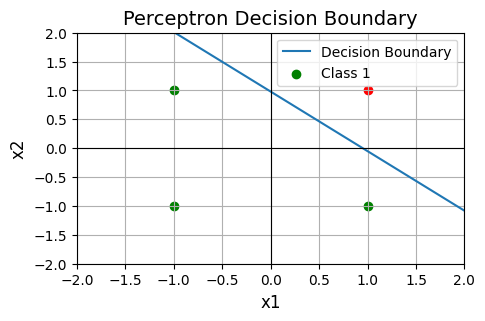

,Input,Predicted,True
0,"[-1, -1]",1.506231,1
1,"[-1, 1]",0.506156,1
2,"[1, -1]",0.474863,1
3,"[1, 1]",-0.525213,-1


In [46]:
# Example 1 from the presentation:
# Data:
inputs = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])
true_outputs = np.array([1, 1, 1, -1])
print_progress = True
learning_rate = 0.1
adaptive_learning_rate = False
min_error = 0.0001
epochs = 15

# Perceptron parameters:
weights = np.random.randn(inputs.shape[1]) * 0.01
bias = float(np.random.randn() * 0.01)
# Train the linear neuron:
perceptron = LinearNeuron(weights, bias)
perceptron.gradient_descent_iterative(inputs, true_outputs, learning_rate, epochs, adaptive_learning_rate, min_error, print_progress)

# Print summary:
print(perceptron)
print("LSQ:", variant)
real_outputs = perceptron.forward(inputs) # forward for the whole dataset
error = perceptron_error(true_outputs, real_outputs)
print(f"Perceptron error: {error}")
print(f"MAE error: {MAE_error(true_outputs, real_outputs)}")
print(f"MSE error: {MSE_error(true_outputs, real_outputs)}")
plot_decision_boundary_2D(perceptron, inputs, true_outputs)

# Create a pandas DataFrame for a nice table
import pandas as pd
df = pd.DataFrame(columns=['Input', 'Predicted', 'True'])
for inputs, label in zip(inputs, true_outputs):
    df.loc[len(df)] = {'Input': inputs, 'Predicted': perceptron.forward(inputs), 'True': label}

df


- finetune parameters (number of epochs, learning rate)

In [51]:
# DataFrame to store the results for comparisons:
experiment_results_r = pd.DataFrame(columns=['MSE', 'MAE', 'Epochs', 'Time', 'Variant', 'Learning Rate', 'Max Epochs', 'Weights', 'Bias', 'Data Description'])
np.random.seed(42)  # For reproducibility
inputs = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])
true_outputs = np.array([1, 1, 1, -1])
data_description_orig = "Ex. 1"
variant = "iterative"

# Perceptron parameters:
weights = [0.05, -0.05]
bias = 0.01
adaptive_learning_rate = False
batch_size = 4
min_error = 0.0001
epochs = 100
learning_rate = 0.1
print_progress = False
data_description = data_description_orig + " " + ("adaptive " if adaptive_learning_rate else "non-adaptive ") + str(min_error) + (str(batch_size) if variant == "batch" else "")

for learning_rate in [0.01, 0.1 , 1]:
    run_example_multiple_times(experiment_results_r, inputs, true_outputs, epochs, weights, bias, learning_rate, print_progress, variant, data_description, adaptive_learning_rate, min_error, batch_size)

learning_rate = 0.1
for epochs in [2, 5, 10, 20]:
    run_example_multiple_times(experiment_results_r, inputs, true_outputs, epochs, weights, bias, learning_rate, print_progress, variant, data_description, adaptive_learning_rate, min_error, batch_size)


print("\nExperiment Results:")
experiment_results_r


Experiment Results:


,MSE,MAE,Epochs,Time,Variant,Learning Rate,Max Epochs,Weights,Bias,Data Description
0,2.501918e-01,5.000000e-01,100.0,0.008037,iterative,0.01,100,"[-0.4907512712824808, -0.4928533275338686]",4.923581e-01,Ex. 1 non-adaptive 0.0001
1,2.509351e-01,5.000000e-01,100.0,0.004753,iterative,0.10,100,"[-0.49524832150174436, -0.4918082256034225]",4.935985e-01,Ex. 1 non-adaptive 0.0001
2,6.925246e+105,3.559292e+52,100.0,0.004987,iterative,1.00,100,"[5.732306771599747e+50, 5.575004078582992e+50]",5.347238e+50,Ex. 1 non-adaptive 0.0001
3,3.411673e-01,5.092720e-01,2.0,0.000118,iterative,0.10,2,"[-0.285430782, -0.323037618]",3.583100e-01,Ex. 1 non-adaptive 0.0001
4,2.565886e-01,5.000000e-01,5.0,0.000245,iterative,0.10,5,"[-0.43257226153383554, -0.4658278697997361]",4.558592e-01,Ex. 1 non-adaptive 0.0001
5,2.508446e-01,5.000000e-01,10.0,0.000469,iterative,0.10,10,"[-0.4965091432275745, -0.5260360975902246]",5.061795e-01,Ex. 1 non-adaptive 0.0001
6,2.507941e-01,5.000000e-01,20.0,0.000924,iterative,0.10,20,"[-0.5022001579770531, -0.5168174292120303]",5.148233e-01,Ex. 1 non-adaptive 0.0001


### Example 2

Gradient Descent iterative:
Epoch: 0, MSE: 0.6097 Weights: [ 0.01948969 -0.21973187] 0.010909341668922753 Learning rate: 0.1000
Epoch: 1, MSE: 0.3808 Weights: [ 0.02151656 -0.38389217] 0.012936206759070812 Learning rate: 0.1000
Epoch: 2, MSE: 0.2377 Weights: [ 0.02113161 -0.51361934] 0.012551260139866668 Learning rate: 0.1000
Epoch: 3, MSE: 0.1480 Weights: [ 0.00986806 -0.61542245] 0.0012877083206336015 Learning rate: 0.1000
Epoch: 4, MSE: 0.0924 Weights: [ 0.01159424 -0.69629529] 0.0030138882864932034 Learning rate: 0.1000
Epoch: 5, MSE: 0.0576 Weights: [ 0.00578165 -0.7599272 ] -0.0027987026991271383 Learning rate: 0.1000
Epoch: 6, MSE: 0.0360 Weights: [ 0.00281416 -0.81031266] -0.0057661900388019625 Learning rate: 0.1000
Epoch: 7, MSE: 0.0225 Weights: [ 0.00147817 -0.85017652] -0.007102177604789515 Learning rate: 0.1000
Epoch: 8, MSE: 0.0140 Weights: [ 0.00404497 -0.88158321] -0.004535381693732531 Learning rate: 0.1000
Epoch: 9, MSE: 0.0088 Weights: [ 0.00532231 -0.90644583] -0.0032

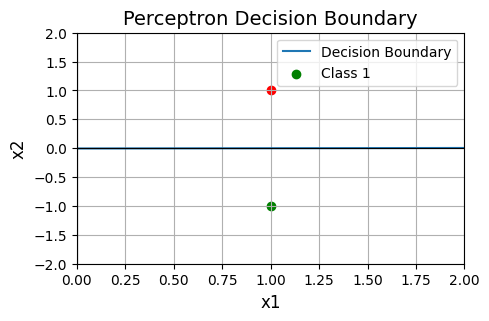

,Input,Predicted,True
0,"[1, -1]",0.971188,1
1,"[1, 1]",-0.971254,-1


In [52]:
# Example 2 from the presentation:
# Data:
inputs = np.array([[1, -1], [1, 1]])
true_outputs = np.array([1, -1])
print_progress = True
learning_rate = 0.1
adaptive_learning_rate = False
min_error = 0.0001
epochs = 15

# Perceptron parameters:
weights = np.random.randn(inputs.shape[1]) * 0.01
bias = float(np.random.randn() * 0.01)
# Train the linear neuron:
perceptron = LinearNeuron(weights, bias)
perceptron.gradient_descent_iterative(inputs, true_outputs, learning_rate, epochs, adaptive_learning_rate, min_error, print_progress)

# Print summary:
print(perceptron)
print("LSQ:", variant)
real_outputs = perceptron.forward(inputs) # forward for the whole dataset
error = perceptron_error(true_outputs, real_outputs)
print(f"Perceptron error: {error}")
print(f"MAE error: {MAE_error(true_outputs, real_outputs)}")
print(f"MSE error: {MSE_error(true_outputs, real_outputs)}")
plot_decision_boundary_2D(perceptron, inputs, true_outputs)

# Create a pandas DataFrame for a nice table
import pandas as pd
df = pd.DataFrame(columns=['Input', 'Predicted', 'True'])
for inputs, label in zip(inputs, true_outputs):
    df.loc[len(df)] = {'Input': inputs, 'Predicted': perceptron.forward(inputs), 'True': label}

df


- finetune parameters (learning rate, epochs):

In [63]:
# DataFrame to store the results for comparisons:
experiment_results_r = pd.DataFrame(columns=['MSE', 'MAE', 'Epochs', 'Time', 'Variant', 'Learning Rate', 'Max Epochs', 'Weights', 'Bias', 'Data Description'])
#np.random.seed(42)  # For reproducibility
inputs = np.array([[1, -1], [1, 1]])
true_outputs = np.array([1, -1])
data_description_orig = "Ex. 2"
variant = "iterative"

# Perceptron parameters:
weights = [0.05, -0.05]
bias = 0.01
adaptive_learning_rate = False
batch_size = 4
min_error = 0.0001
epochs = 100
learning_rate = 0.1
print_progress = False
data_description = data_description_orig + " " + ("adaptive " if adaptive_learning_rate else "non-adaptive ") + str(min_error) + (str(batch_size) if variant == "batch" else "")

for learning_rate in [0.01, 0.1 , 1]:
    run_example_multiple_times(experiment_results_r, inputs, true_outputs, epochs, weights, bias, learning_rate, print_progress, variant, data_description, adaptive_learning_rate, min_error, batch_size)

learning_rate = 0.1
for epochs in [2, 5, 10, 20, 30]:
    run_example_multiple_times(experiment_results_r, inputs, true_outputs, epochs, weights, bias, learning_rate, print_progress, variant, data_description, adaptive_learning_rate, min_error, batch_size)


print("\nExperiment Results:")
experiment_results_r


Experiment Results:


,MSE,MAE,Epochs,Time,Variant,Learning Rate,Max Epochs,Weights,Bias,Data Description
0,1.555366e-02,1.247104e-01,100.0,0.004110,iterative,0.01,100,"[0.020544068759027426, -0.8752957335720839]",-1.945593e-02,Ex. 2 non-adaptive 0.0001
1,7.268195e-05,8.515798e-03,20.0,0.000727,iterative,0.10,100,"[0.020339416735961013, -0.9915089408234926]",-1.966058e-02,Ex. 2 non-adaptive 0.0001
2,2.150882e+69,1.888972e+34,100.0,0.003585,iterative,1.00,100,"[7.040738608633474e+31, -3.862104792955891e+32]",7.040739e+31,Ex. 2 non-adaptive 0.0001
3,3.525224e-01,5.927446e-01,2.0,0.000090,iterative,0.10,2,"[0.044921, -0.4081410000000001]",4.921000e-03,Ex. 2 non-adaptive 0.0001
4,8.563409e-02,2.923849e-01,5.0,0.000189,iterative,0.10,5,"[0.013477421683000014, -0.707599854257]",-2.652258e-02,Ex. 2 non-adaptive 0.0001
5,8.099749e-03,8.997163e-02,10.0,0.000363,iterative,0.10,10,"[0.01947099357310881, -0.9102173399075613]",-2.052901e-02,Ex. 2 non-adaptive 0.0001
6,7.272000e-05,8.520963e-03,20.0,0.000706,iterative,0.10,20,"[0.020162792967329285, -0.9914691528352076]",-1.983721e-02,Ex. 2 non-adaptive 0.0001
7,7.261771e-05,8.514881e-03,20.0,0.000727,iterative,0.10,30,"[0.020277181747178807, -0.9915313932289329]",-1.972282e-02,Ex. 2 non-adaptive 0.0001


### Example 3: linear regression
- experiment with the noise levels and with the parameters of the training parameters

(1,)
Gradient Descent iterative:
Epoch: 0, MSE: 0.0396 Weights: [1.46123909] 3.051241863991872 Learning rate: 0.1000
Epoch: 1, MSE: 0.0369 Weights: [1.55509245] 2.973760152257707 Learning rate: 0.0707
Epoch: 2, MSE: 0.0356 Weights: [1.53981834] 3.0072196623278797 Learning rate: 0.0577
Epoch: 3, MSE: 0.0358 Weights: [1.52886541] 3.02043768037609 Learning rate: 0.0500
Epoch: 4, MSE: 0.0368 Weights: [1.53377966] 2.97123686290379 Learning rate: 0.0447
Epoch: 5, MSE: 0.0379 Weights: [1.54791587] 2.959027187753584 Learning rate: 0.0408
Epoch: 6, MSE: 0.0359 Weights: [1.52700113] 2.989765400437713 Learning rate: 0.0378
Epoch: 7, MSE: 0.0356 Weights: [1.53017199] 3.007871965997395 Learning rate: 0.0354
Epoch: 8, MSE: 0.0356 Weights: [1.53377571] 3.006295410143389 Learning rate: 0.0333
Epoch: 9, MSE: 0.0357 Weights: [1.51869756] 3.0038793048809085 Learning rate: 0.0316
Epoch: 10, MSE: 0.0356 Weights: [1.53909952] 3.0058377893610855 Learning rate: 0.0302
Epoch: 11, MSE: 0.0359 Weights: [1.534859

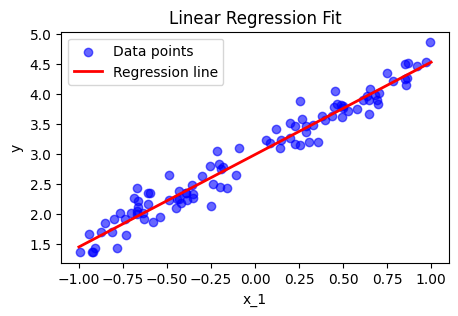

,Input,Predicted,True
0,[-0.44773153861769366],2.306284,2.106983
1,[0.610508610206774],3.933535,3.898715
2,[-0.9414100861116999],1.547157,1.673684
3,[-0.1566964968525424],2.753807,2.444063
4,[0.4516370894275734],3.689239,4.052825
...,...,...,...
95,[0.060109482201625486],3.087189,3.239449
96,[0.9206960140280562],4.410509,4.471509
97,[0.3820683448998081],3.582263,3.641267
98,[-0.3515025178511526],2.454255,2.344883


In [ ]:
# Example: linear regression
# Data:
N = 100  # The number of samples
D = 1  # The number of features
inputs = np.random.uniform(-1, 1, size=(N, D))  # Random values between -1 and 1
true_outputs = (1.5 * inputs[:, [0]] + 3 + np.random.randn(N, 1) / 5).reshape(-1)

print_progress = True
learning_rate = 0.1
adaptive_learning_rate = True
min_error = 0.0001
epochs = 15

# Perceptron parameters:
weights = np.random.randn(D) * 0.01
bias = float(np.random.randn() * 0.01)

# Train the linear neuron:
perceptron = LinearNeuron(weights, bias)
perceptron.gradient_descent_iterative(inputs, true_outputs, learning_rate, epochs, adaptive_learning_rate, min_error, print_progress)

# Print summary:
print(perceptron)
print("LSQ:", variant)
real_outputs = perceptron.forward(inputs) # forward for the whole dataset
error = perceptron_error(true_outputs, real_outputs)
print(f"Perceptron error: {error}")
print(f"MAE error: {MAE_error(true_outputs, real_outputs)}")
print(f"MSE error: {MSE_error(true_outputs, real_outputs)}")
plot_regression(perceptron, inputs, true_outputs)

# Create a pandas DataFrame for a nice table
import pandas as pd
df = pd.DataFrame(columns=['Input', 'Predicted', 'True'])
for inputs, label in zip(inputs, true_outputs):
    df.loc[len(df)] = {'Input': inputs, 'Predicted': perceptron.forward(inputs), 'True': label}
df


### Example 3 and the batch variant of gradient descent

Gradient Descent Batch:
Epoch: 0, MSE: 7.4414 Weights: [0.01821017] Bias: 0.2864284919074652 Learning rate: 0.1000
Epoch: 1, MSE: 6.1365 Weights: [0.05058259] Bias: 0.5463295005332988 Learning rate: 0.1000
Epoch: 2, MSE: 5.0737 Weights: [0.08323854] Bias: 0.7804067073686148 Learning rate: 0.1000
Epoch: 3, MSE: 4.2072 Weights: [0.11603614] Bias: 0.9912439490658341 Learning rate: 0.1000
Epoch: 4, MSE: 3.5001 Weights: [0.14885142] Bias: 1.1811659498251874 Learning rate: 0.1000
Epoch: 5, MSE: 2.9222 Weights: [0.18157634] Bias: 1.3522643245000994 Learning rate: 0.1000
Epoch: 6, MSE: 2.4493 Weights: [0.21411715] Bias: 1.5064209715701806 Learning rate: 0.1000
Epoch: 7, MSE: 2.0618 Weights: [0.2463928] Bias: 1.6453291180003309 Learning rate: 0.1000
Epoch: 8, MSE: 1.7435 Weights: [0.27833356] Bias: 1.7705122517010725 Learning rate: 0.1000
Epoch: 9, MSE: 1.4817 Weights: [0.30987982] Bias: 1.8833411536423967 Learning rate: 0.1000
Epoch: 10, MSE: 1.2658 Weights: [0.34098092] Bias: 1.98504922038604

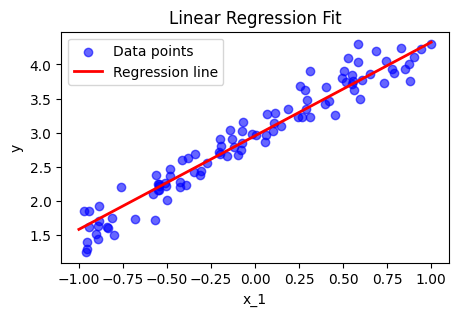

,Input,Predicted,True
0,[-0.8839351376020226],1.739351,1.917699
1,[-0.956084628320117],1.640253,1.292487
2,[0.421804459170916],3.532790,3.465563
3,[0.10449477972835597],3.096964,3.023369
4,[0.11454395720615551],3.110766,3.283868
...,...,...,...
95,[-0.5499153429099857],2.198129,2.239354
96,[0.14643303316419698],3.154566,3.090349
97,[0.10814944376547153],3.101983,3.136803
98,[-0.8116579898975989],1.838624,1.753499


In [ ]:
# Example: linear regression
# Data:
N = 100  # The number of samples
D = 1  # The number of features
inputs = np.random.uniform(-1, 1, size=(N, D))  # Random values between -1 and 1
true_outputs = (1.5 * inputs[:, [0]] + 3 + np.random.randn(N, 1) / 5).reshape(-1)

print_progress = True
learning_rate = 0.1
adaptive_learning_rate = False
min_error = 0.0001
epochs = 100
batch_size=N

# Perceptron parameters:
weights = np.random.randn(D) * 0.01

bias = float(np.random.randn() * 0.01)

# Train the linear neuron:
perceptron = LinearNeuron(weights, bias)
perceptron.gradient_descent_batch(inputs, true_outputs, learning_rate, epochs, batch_size, adaptive_learning_rate, min_error, print_progress)

# Print summary:
print(perceptron)
print("LSQ:", variant)
real_outputs = perceptron.forward(inputs) # forward for the whole dataset
error = perceptron_error(true_outputs, real_outputs)
print(f"Perceptron error: {error}")
print(f"MAE error: {MAE_error(true_outputs, real_outputs)}")
print(f"MSE error: {MSE_error(true_outputs, real_outputs)}")
plot_regression(perceptron, inputs, true_outputs)

# Create a pandas DataFrame for a nice table
import pandas as pd
df = pd.DataFrame(columns=['Input', 'Predicted', 'True'])
for inputs, label in zip(inputs, true_outputs):
    df.loc[len(df)] = {'Input': inputs, 'Predicted': perceptron.forward(inputs), 'True': label}
df


- comparison

In [75]:
# DataFrame to store the results for comparisons:
experiment_results_r = pd.DataFrame(columns=['MSE', 'MAE', 'Epochs', 'Time', 'Variant', 'Learning Rate', 'Max Epochs', 'Weights', 'Bias', 'Data Description'])
np.random.seed(42)  # For reproducibility
N = 100  # The number of samples
D = 1  # The number of features
inputs = np.random.uniform(-1, 1, size=(N, D))  # Random values between -1 and 1
true_outputs = (1.5 * inputs[:, [0]] + 3 + np.random.randn(N, 1) / 5).reshape(-1)
data_description_orig = "Ex. 2"
variant = "iterative"

# Perceptron parameters:
weights = np.random.randn(D) * 0.01
bias = float(np.random.randn() * 0.01)
adaptive_learning_rate = True
batch_size = 4
min_error = 0.0001
epochs = 20
learning_rate = 0.1
print_progress = False
data_description = data_description_orig + " " + ("adaptive " if adaptive_learning_rate else "non-adaptive ") + str(min_error) + (str(batch_size) if variant == "batch" else "")

for learning_rate in [0.01, 0.1 , 1]:
    run_example_multiple_times(experiment_results_r, inputs, true_outputs, epochs, weights, bias, learning_rate, print_progress, variant, data_description, adaptive_learning_rate, min_error, batch_size)

learning_rate = 0.1
for epochs in [1, 2, 5]:
    run_example_multiple_times(experiment_results_r, inputs, true_outputs, epochs, weights, bias, learning_rate, print_progress, variant, data_description, adaptive_learning_rate, min_error, batch_size)


print("\nExperiment Results:")
experiment_results_r


Experiment Results:


,MSE,MAE,Epochs,Time,Variant,Learning Rate,Max Epochs,Weights,Bias,Data Description
0,0.032913,0.140460,20.0,0.011801,iterative,0.01,20,[1.453428877792163],2.994146,Ex. 2 adaptive 0.0001
1,0.032368,0.140551,20.0,0.011297,iterative,0.10,20,[1.453428877792163],3.005052,Ex. 2 adaptive 0.0001
2,0.040732,0.159647,20.0,0.013378,iterative,1.00,20,[1.453428877792163],3.017471,Ex. 2 adaptive 0.0001
3,0.033267,0.143244,1.0,0.000559,iterative,0.10,1,[1.453428877792163],2.990305,Ex. 2 adaptive 0.0001
4,0.033480,0.143747,2.0,0.001090,iterative,0.10,2,[1.453428877792163],2.963364,Ex. 2 adaptive 0.0001
5,0.033628,0.143632,5.0,0.002729,iterative,0.10,5,[1.453428877792163],2.934334,Ex. 2 adaptive 0.0001


In [97]:
# DataFrame to store the results for comparisons:
experiment_results_r = pd.DataFrame(columns=['MSE', 'MAE', 'Epochs', 'Time', 'Variant', 'Learning Rate', 'Max Epochs', 'Weights', 'Bias', 'Data Description'])
np.random.seed(42)  # For reproducibility
N = 100  # The number of samples
D = 1  # The number of features
inputs = np.random.uniform(-1, 1, size=(N, D))  # Random values between -1 and 1
true_outputs = (1.5 * inputs[:, [0]] + 3 + np.random.randn(N, 1) / 5).reshape(-1)
data_description_orig = "Ex. 2"
variant = "batch"

# Perceptron parameters:
weights = np.random.randn(D) * 0.01
bias = float(np.random.randn() * 0.01)
adaptive_learning_rate = False
batch_size = 4
min_error = 0.0001
epochs = 20
learning_rate = 0.1
print_progress = False


data_description = data_description_orig + " " + ("adaptive " if adaptive_learning_rate else "non-adaptive ") + str(min_error) + (str(batch_size) if variant == "batch" else "")

for learning_rate in [0.01, 0.1 , 1]:
    run_example_multiple_times(experiment_results_r, inputs, true_outputs, epochs, weights, bias, learning_rate, print_progress, variant, data_description, adaptive_learning_rate, min_error, batch_size)

learning_rate = 0.1
for epochs in [10, 20, 50]:
    run_example_multiple_times(experiment_results_r, inputs, true_outputs, epochs, weights, bias, learning_rate, print_progress, variant, data_description, adaptive_learning_rate, min_error, batch_size)


print("\nExperiment Results:")
experiment_results_r


Experiment Results:


,MSE,MAE,Epochs,Time,Variant,Learning Rate,Max Epochs,Weights,Bias,Data Description
0,0.037009,0.148427,20.0,0.013494,batch,0.01,20,[1.4455612766467214],2.973508,Ex. 2 non-adaptive 0.00014
1,0.032405,0.140667,20.0,0.012696,batch,0.10,20,[1.4455612766467214],3.005754,Ex. 2 non-adaptive 0.00014
2,0.048894,0.176231,20.0,0.015485,batch,1.00,20,[1.4455612766467214],3.059674,Ex. 2 non-adaptive 0.00014
3,0.032370,0.140669,10.0,0.010931,batch,0.10,10,[1.4455612766467214],2.993188,Ex. 2 non-adaptive 0.00014
4,0.032335,0.140452,20.0,0.021691,batch,0.10,20,[1.4455612766467214],3.003167,Ex. 2 non-adaptive 0.00014
5,0.032435,0.140417,50.0,0.047402,batch,0.10,50,[1.4455612766467214],3.008323,Ex. 2 non-adaptive 0.00014


### Example 3B - Linear regression with two input dimensions

In [96]:
# Define parameters
N = 100
D = 2
# Generate x1 and x2
x1 = np.linspace(-1, 1, N).reshape(-1, 1)  # Column vector (N,1)
x2 = np.linspace(-1, 1, N).reshape(-1, 1)
x2 = x2[np.random.permutation(N)]  # Randomly shuffle x2
inputs = np.hstack([x1, x2])
# TRY different coefficients and noise:
true_outputs = 2*x1 + 3*x2 - 4 + np.random.randn(*x1.shape)/2 + np.random.randn(*x1.shape)/5 * x1
#true_outputs = -4*x1 + 6*x2 + 10 + np.random.randn(*x1.shape)/2 + np.random.randn(*x1.shape)/5 * x1


print_progress = True
learning_rate = 0.1
adaptive_learning_rate = True
min_error = 0.0001
epochs = 15

# Perceptron parameters:
weights = np.random.randn(D) * 0.01
bias = float(np.random.randn() * 0.01)

# Train the linear neuron:
perceptron = LinearNeuron(weights, bias)
perceptron.gradient_descent_iterative(inputs, true_outputs, learning_rate, epochs, adaptive_learning_rate, min_error, print_progress)

# Print summary:
print(perceptron)
print(variant)
real_outputs = perceptron.forward(inputs) # forward for the whole dataset
error = perceptron_error(true_outputs, real_outputs)
print(f"Perceptron error: {error}")
print(f"MAE error: {MAE_error(true_outputs, real_outputs)}")
print(f"MSE error: {MSE_error(true_outputs, real_outputs)}")
#plot_regression(perceptron, inputs, true_outputs)

# Create a pandas DataFrame for a nice table
import pandas as pd
df = pd.DataFrame(columns=['Input', 'Predicted', 'True'])
for inputs, label in zip(inputs, true_outputs):
    df.loc[len(df)] = {'Input': inputs, 'Predicted': perceptron.forward(inputs), 'True': label}
df




Gradient Descent iterative:
Epoch: 0, MSE: 8.8748 Weights: [1.90640508 2.91118694] [-4.21467705] Learning rate: 0.1000
Epoch: 1, MSE: 9.1565 Weights: [2.03290391 2.96057258] [-3.95004188] Learning rate: 0.0707
Epoch: 2, MSE: 8.9515 Weights: [2.04336202 2.86172263] [-4.09633268] Learning rate: 0.0577
Epoch: 3, MSE: 8.9692 Weights: [1.96155384 2.92608412] [-4.03613844] Learning rate: 0.0500
Epoch: 4, MSE: 9.1486 Weights: [1.98086292 3.00143065] [-4.15136884] Learning rate: 0.0447
Epoch: 5, MSE: 9.1356 Weights: [1.97946436 2.99699117] [-4.12822848] Learning rate: 0.0408
Epoch: 6, MSE: 9.1259 Weights: [1.96352298 3.00069918] [-4.17219811] Learning rate: 0.0378
Epoch: 7, MSE: 9.0951 Weights: [2.00457588 2.95800573] [-4.02369375] Learning rate: 0.0354
Epoch: 8, MSE: 9.1686 Weights: [2.0352853  2.97545264] [-4.09757065] Learning rate: 0.0333
Epoch: 9, MSE: 9.0431 Weights: [1.98777323 2.94660625] [-4.10247595] Learning rate: 0.0316
Epoch: 10, MSE: 9.0889 Weights: [1.99081166 2.96391883] [-4.01

,Input,Predicted,True
0,"[-1.0, -0.23232323232323226]",[-6.720284000719895],[-7.161509189155275]
1,"[-0.9797979797979798, -0.9191919191919192]",[-8.699294150301677],[-8.809347696828848]
2,"[-0.9595959595959596, 0.595959595959596]",[-4.204835290273844],[-4.907142998599848]
3,"[-0.9393939393939394, -0.2727272727272727]",[-6.71835205532798],[-6.146505313870493]
4,"[-0.9191919191919192, -0.8181818181818181]",[-8.281634837320153],[-8.334637984631772]
...,...,...,...
95,"[0.9191919191919193, -0.5757575757575757]",[-3.907386487358959],[-2.9064035443695837]
96,"[0.9393939393939394, -0.11111111111111105]",[-2.5011880722825026],[-2.790866428507463]
97,"[0.9595959595959598, -0.5555555555555556]",[-3.767522734567813],[-5.162627225062118]
98,"[0.9797979797979799, -0.1717171717171716]",[-2.598882815256846],[-2.7995411113800017]


In [99]:
# Define parameters
N = 100
D = 2
# Generate x1 and x2
x1 = np.linspace(-1, 1, N).reshape(-1, 1)  # Column vector (N,1)
x2 = np.linspace(-1, 1, N).reshape(-1, 1)
x2 = x2[np.random.permutation(N)]  # Randomly shuffle x2
inputs = np.hstack([x1, x2])
# TRY different coefficients and noise:
true_outputs = 2*x1 + 3*x2 - 4 + np.random.randn(*x1.shape)/2 + np.random.randn(*x1.shape)/5 * x1
#true_outputs = -4*x1 + 6*x2 + 10 + np.random.randn(*x1.shape)/2 + np.random.randn(*x1.shape)/5 * x1


# DataFrame to store the results for comparisons:
experiment_results_r = pd.DataFrame(columns=['MSE', 'MAE', 'Epochs', 'Time', 'Variant', 'Learning Rate', 'Max Epochs', 'Weights', 'Bias', 'Data Description'])
np.random.seed(42)  # For reproducibility

data_description_orig = "Regr 2"
variant = "iterative"

# Perceptron parameters:
weights = np.random.randn(D) * 0.01
bias = float(np.random.randn() * 0.01)
adaptive_learning_rate = False
batch_size = 4
min_error = 0.0001
epochs = 20
learning_rate = 0.1
print_progress = False


data_description = data_description_orig + " " + ("adaptive " if adaptive_learning_rate else "non-adaptive ") + str(min_error) + (str(batch_size) if variant == "batch" else "")

for learning_rate in [0.01, 0.1 , 1]:
    run_example_multiple_times(experiment_results_r, inputs, true_outputs, epochs, weights, bias, learning_rate, print_progress, variant, data_description, adaptive_learning_rate, min_error, batch_size)

learning_rate = 0.1
for epochs in [10, 20, 50]:
    run_example_multiple_times(experiment_results_r, inputs, true_outputs, epochs, weights, bias, learning_rate, print_progress, variant, data_description, adaptive_learning_rate, min_error, batch_size)


print("\nExperiment Results:")
experiment_results_r


Experiment Results:


,MSE,MAE,Epochs,Time,Variant,Learning Rate,Max Epochs,Weights,Bias,Data Description
0,10.092870,2.574911,20.0,0.043625,iterative,0.01,20,"[1.8170799953530308, 2.9506166513068375]",[-3.9902110028090756],Regr 2 non-adaptive 0.0001
1,10.048388,2.569306,20.0,0.038931,iterative,0.10,20,"[1.8170799953530308, 2.9506166513068375]",[-3.883286497571789],Regr 2 non-adaptive 0.0001
2,10.935402,2.661887,20.0,0.043543,iterative,1.00,20,"[1.8170799953530308, 2.9506166513068375]",[-3.2573937234151487],Regr 2 non-adaptive 0.0001
3,10.123887,2.578916,10.0,0.020874,iterative,0.10,10,"[1.8170799953530308, 2.9506166513068375]",[-3.9445577966388434],Regr 2 non-adaptive 0.0001
4,10.065503,2.571350,20.0,0.049991,iterative,0.10,20,"[1.8170799953530308, 2.9506166513068375]",[-3.9559753646095888],Regr 2 non-adaptive 0.0001
5,10.126013,2.578906,50.0,0.057440,iterative,0.10,50,"[1.8170799953530308, 2.9506166513068375]",[-3.9692939804486134],Regr 2 non-adaptive 0.0001
